# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
#Parse the HTML
html = browser.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
#Find all title header elements 'th'
title_headers = soup.find_all('th')

#Find all elements with class 'article_teaser_body'
data_rows = soup.find_all('tr', class_='data-row')

#Print titles and previews for confirmation
for title_headers, data_rows in zip(title_headers, data_rows):
    print('Title Header:', title_headers.text.strip())
    print('Data Row:', data_rows.text.strip())
    print()

Title Header: id
Data Row: 2
2012-08-16
10
155
6
-75.0
739.0

Title Header: terrestrial_date
Data Row: 13
2012-08-17
11
156
6
-76.0
740.0

Title Header: sol
Data Row: 24
2012-08-18
12
156
6
-76.0
741.0

Title Header: ls
Data Row: 35
2012-08-19
13
157
6
-74.0
732.0

Title Header: month
Data Row: 46
2012-08-20
14
157
6
-74.0
740.0

Title Header: min_temp
Data Row: 57
2012-08-21
15
158
6
-78.0
740.0

Title Header: pressure
Data Row: 68
2012-08-22
16
158
6
-77.0
740.0



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Assuming you have BeautifulSoup objects: 'headers' for the column headers, 'rows' for the data rows
title_headers = [title_header.text.strip() for title_header in soup.find_all('th')]  # Assuming 'th' tags for headers
data_rows = soup.find_all('tr')[1:]  # Assuming the first 'tr' is headers, skip it
# Create an empty list
data_row_table = []
# Loop through the scraped data to create a list of rows
# Loop through the text elements
# Extract the 'title header' and 'data rows' text from the elements
# Store each title and preview pair in a dictionary
# Add the dictionary to the list
for row in data_rows:
    cells = row.find_all('td')  # Assuming 'td' tags for data cells
    if len(cells) == len(title_headers):  # Check to make sure each row has the correct number of cells
        # Create a dictionary with headers as keys and cell data as values
        row_dict = {title_headers[i]: cell.text.strip() for i, cell in enumerate(cells)}
        # Add the dictionary to the list
        data_row_table.append(row_dict)
for row in data_row_table[:5]:  # Print first 5 rows to check
    print(row)

{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_row_table)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
# Convert 'terrestrial_date' from object to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' to int64
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')

# Convert 'min_temp' and 'pressure' to float64
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts().sort_index()
print(month_counts)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?
number_of_martian_days = len(df)
print("Number of Martian days' worth of data:", number_of_martian_days)


Number of Martian days' worth of data: 1867


In [14]:
# 3. What is the average low temperature by month?
#df["min_temp"].groupby("month").mean()
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()
average_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Initial data types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

Data types after cleaning:
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                         int8
min_temp                   float64
pressure                   float64
dtype: object

Data types in temp_data:
month              int8
avg_min_temp    float64
dtype: object


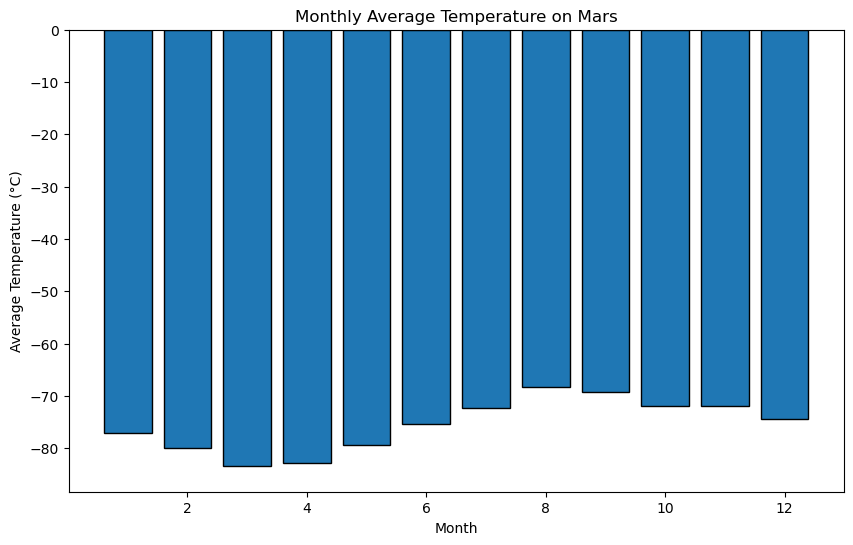

In [15]:
# Plot the average temperature by month
# Check initial data types
print("Initial data types:")
print(df.dtypes)

# Drop any rows where 'min_temp' might be NaN or non-numeric (if applicable)
df = df.dropna(subset=['min_temp'])
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')  # Convert to float, make errors NaN
df['month'] = pd.to_numeric(df['month'], errors='coerce', downcast='integer')  # Convert to int, make errors NaN

# Verify the data again
print("\nData types after cleaning:")
print(df.dtypes)

# Calculate the average temperature by month
average_temp_by_month = df.groupby('month')['min_temp'].mean()

# Convert the Series returned by groupby into a DataFrame for plotting
temp_data = average_temp_by_month.reset_index()
temp_data.columns = ['month', 'avg_min_temp']  # Renaming columns for clarity

# Check data types again after grouping and resetting index
print("\nData types in temp_data:")
print(temp_data.dtypes)

# Explicitly converting data types, ensuring they're correct for plotting
temp_data['month'] = temp_data['month'].astype(int)
temp_data['avg_min_temp'] = temp_data['avg_min_temp'].astype(float)

# Build bar chart for month vs. average min_temp
plt.figure(figsize=(10, 6))
plt.bar(temp_data['month'], temp_data['avg_min_temp'], edgecolor='black')

# Set the y-axis to start from 0 and adjust limits appropriately
plt.ylim([0, min(temp_data['avg_min_temp']) - 5])  # Ensure the range includes only negative values

# Invert the y-axis so 0 starts at the top
plt.gca().invert_yaxis()

plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title("Monthly Average Temperature on Mars")

# Show plot
plt.show()


In [16]:
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                         int8
min_temp                   float64
pressure                   float64
dtype: object


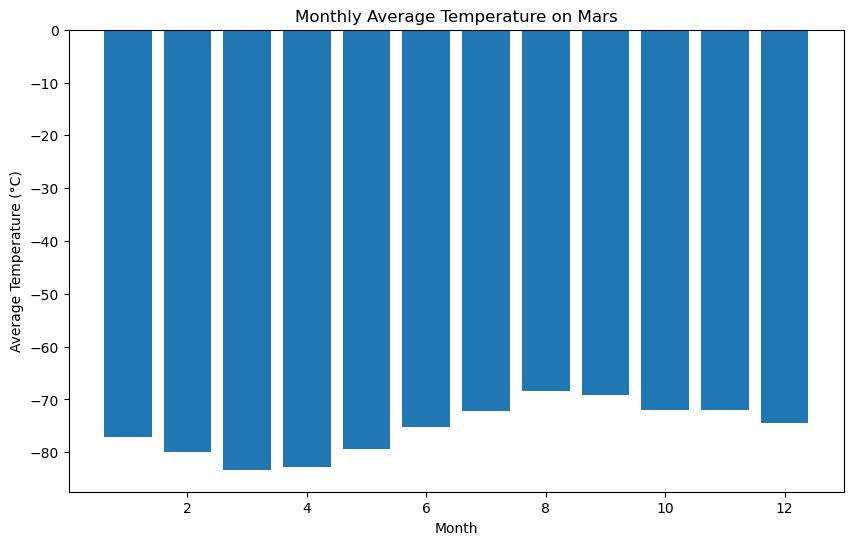

Hottest Month: 8 with an average temperature of -68.38°C
Coldest Month: 3 with an average temperature of -83.31°C


In [17]:
# Identify the coldest and hottest months in Curiosity's location
# Convert data types if needed and handle NaNs
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')
df.dropna(inplace=True)  # Dropping NaNs if conversion introduced any

# Calculate the average temperature by month
average_temp = df.groupby('month')['min_temp'].mean()

# Find the hottest and coldest months
hottest_month = average_temp.idxmax()
coldest_month = average_temp.idxmin()

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Month': average_temp.index,
    'Average Temp (°C)': average_temp.values
})

# Plotting only temperature data
plt.figure(figsize=(10, 6))
plt.bar(plot_data['Month'], plot_data['Average Temp (°C)'], color='tab:blue')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Monthly Average Temperature on Mars')
plt.show()

# Print the hottest and coldest months
print(f"Hottest Month: {hottest_month} with an average temperature of {average_temp[hottest_month]:.2f}°C")
print(f"Coldest Month: {coldest_month} with an average temperature of {average_temp[coldest_month]:.2f}°C")



In [21]:
# 4. Average pressure by Martian month
# Check initial data types
#print("Initial data types:")
#print(df.dtypes)

# Calculate the average temperature by month
average_pressure = df.groupby('month')['pressure'].mean()

average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

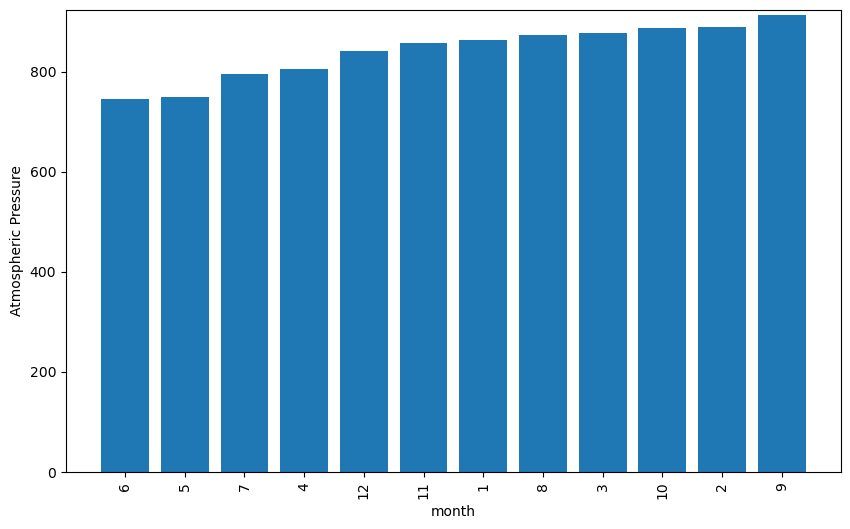

In [43]:
# Plot the average pressure by month
#Convert the Series to a DataFrame for plotting
average_pressure_df = average_pressure.reset_index()
average_pressure_df.columns = ['month', 'average_pressure']

#Sort the DataFrame by 'average_pressure' in ascending order
average_pressure_df = average_pressure_df.sort_values(by='average_pressure')

#Assuming average_pressure_df is already sorted and prepared for plotting
plt.figure(figsize=(10, 6))

#Plot the bar chart using a range index for alignment
bars = plt.bar(range(len(average_pressure_df)), average_pressure_df['average_pressure'], color='tab:blue')

#Set x-ticks: Use range index for ticks and sorted month values for labels
plt.xticks(ticks=range(len(average_pressure_df['month'])), labels=average_pressure_df['month'], rotation=90)

#Ensure y-axis limits start from a realistic minimum (slightly below the lowest pressure to ensure visibility)
plt.ylim(0, average_pressure_df['average_pressure'].max() + 10)

plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')

plt.show()

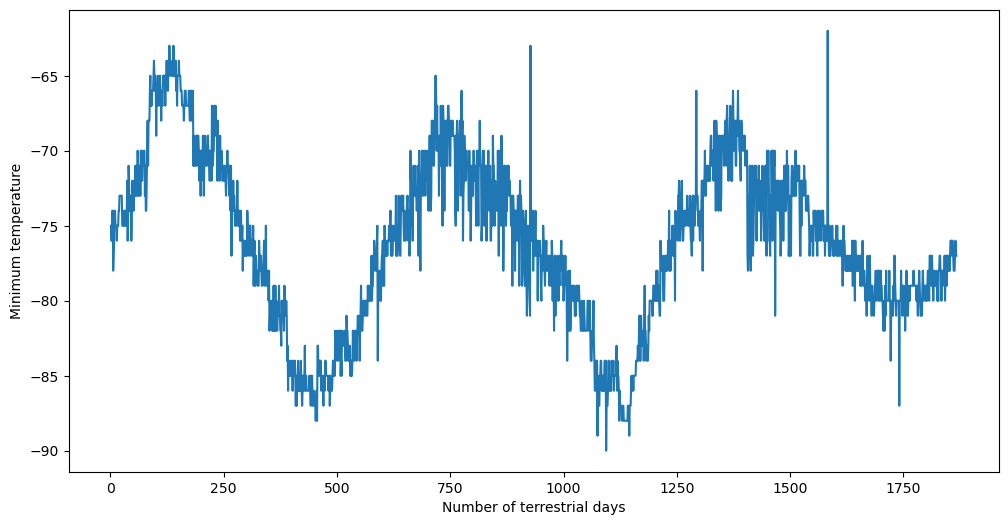

In [53]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['terrestrial_days'] = range(1, len(df) + 1)  # Creating a terrestrial days column from 1 to number of rows

# Plotting
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
plt.plot(df['terrestrial_days'], df['min_temp'], label='Minimum Temperature')

# Adding labels and title
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')

max_days = df['terrestrial_days'].max()
tick_values = range(0, max_days + 1, 250) 
plt.xticks(ticks=tick_values)

plt.show()


On average, the third month has the coldest minimum temperature on Mars at -83.31 degrees Celsius (or -117.95 degrees Fahrenheit), and the eighth month is the warmest at -68.38° celsius (or -91.08 Fahrenheit. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [55]:
# Write the data to a CSV
df.to_csv('mars_data_output.csv')

In [56]:
browser.quit()